# Portfolio Optimization using GRU

In [3]:
from utils import load_data
from models import gru_model
from PortfolioEnvironment import PortfolioEnvironment
from DQNAgent import DQNAgent

import numpy as np

In [4]:
df = load_data()
df.head().T

,0,1,2,3,4
close,256.13,258.04,258.11,258.89,261.87
close2,45.82,45.85,45.13,44.90,45.13
close3,525.80,532.75,530.28,533.88,538.33
close4,267.15,267.88,268.48,272.25,278.12
close5,71.36,72.73,72.71,74.20,74.33


In [5]:
# Training the DQN agent
env = PortfolioEnvironment(df)
state_size = len(env.reset())  # Number of features in the state
action_size = 3  # Number of actions (Buy, Hold, Sell)
agent = DQNAgent(state_size, action_size, gru_model)

num_episodes = 100
batch_size = 32

C:\Users\MSI\.virtualenvs\FoML_Project\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [6]:
# Lists to store episode rewards
episode_rewards = []

for episode in range(num_episodes):
    state = env.reset()
    state = np.reshape(state.values, [1, state_size])
    total_reward = 0

    for step in range(env.max_steps):
        action = agent.act(state)
        next_state, reward, done = env.step(action)
        next_state = np.reshape(next_state.values, [1, state_size])
        agent.remember(state, action, reward, next_state, done)
        state = next_state
        total_reward += reward

        if done:
            break

    agent.replay(batch_size)
    agent.target_train()

    # Decay exploration rate
    if agent.epsilon > agent.epsilon_min:
        agent.epsilon *= agent.epsilon_decay

    episode_rewards.append(total_reward)
    print(f"Episode: {episode + 1}, Total Reward: {total_reward}")


Episode: 1, Total Reward: 17.124100000000006
Episode: 2, Total Reward: 38.15319999999996
Episode: 3, Total Reward: 2.6534000000000098
Episode: 4, Total Reward: -6.345399999999986
Episode: 5, Total Reward: 19.519299999999994
Episode: 6, Total Reward: -17.06659999999999
Episode: 7, Total Reward: -51.6212
Episode: 8, Total Reward: -5.414000000000016
Episode: 9, Total Reward: -8.727900000000002
Episode: 10, Total Reward: -8.336100000000004
Episode: 11, Total Reward: -67.7704
Episode: 12, Total Reward: -31.68920000000001
Episode: 13, Total Reward: 39.617500000000014
Episode: 14, Total Reward: 29.52269999999999
Episode: 15, Total Reward: 30.805500000000006
Episode: 16, Total Reward: 18.685399999999998
Episode: 17, Total Reward: -19.292900000000007
Episode: 18, Total Reward: 1.2067999999999954
Episode: 19, Total Reward: 18.063599999999997
Episode: 20, Total Reward: -38.02190000000002
Episode: 21, Total Reward: 18.574299999999994
Episode: 22, Total Reward: -27.235099999999996
Episode: 23, Tota

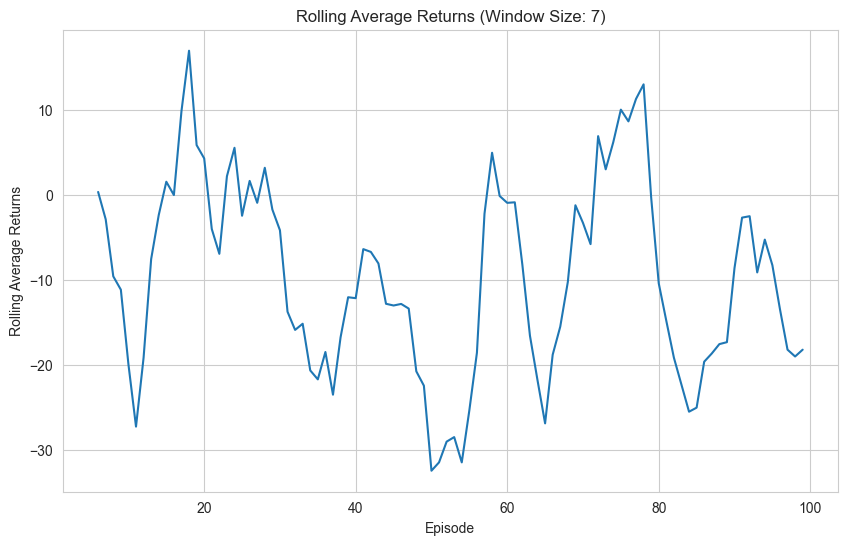

In [7]:
import matplotlib.pyplot as plt
import pandas as pd

# Convert episode_rewards to a pandas Series
episode_rewards = pd.Series(episode_rewards)

# Calculate rolling average returns
window_size = 7
rolling_avg_returns = episode_rewards.rolling(window=window_size).mean()

# Plot rolling average returns
plt.figure(figsize=(10, 6))
plt.plot(rolling_avg_returns)
plt.xlabel('Episode')
plt.ylabel('Rolling Average Returns')
plt.title(f'Rolling Average Returns (Window Size: {window_size})')
plt.show()

In [10]:
from tabulate import tabulate

# Assuming you have a list of episode_rewards
# episode_rewards = [reward1, reward2, ..., reward_n]

# Create a list of tuples containing episode number and reward
episode_data = [(episode + 1, reward) for episode, reward in enumerate(episode_rewards)]

# Print the table
table_headers = ["Episode", "Total Reward"]
table = tabulate(episode_data, headers=table_headers, tablefmt="pretty")

print(table)


+---------+---------------------+
| Episode |    Total Reward     |
+---------+---------------------+
|    1    | 13.946400000000018  |
|    2    | -28.034900000000007 |
|    3    |       67.2712       |
|    4    |      -52.6605       |
|    5    |  7.042900000000013  |
|    6    | -36.88309999999999  |
|    7    | -2.478399999999985  |
|    8    | -0.8271999999999942 |
|    9    | 11.926500000000004  |
|   10    |       10.6052       |
+---------+---------------------+


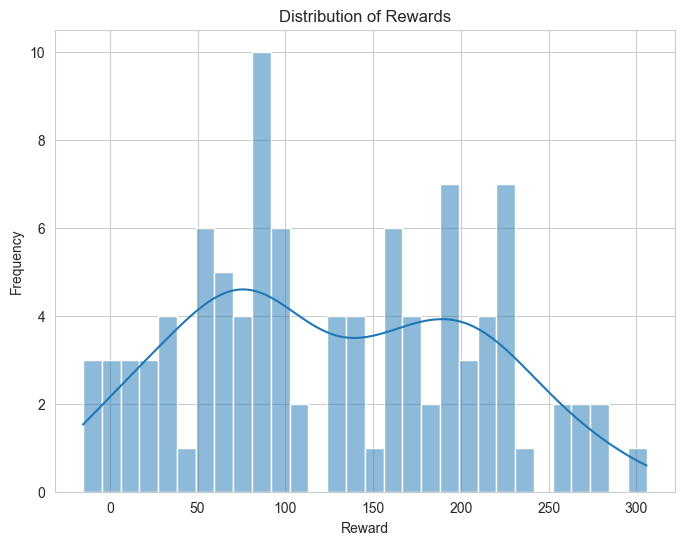

In [8]:
import seaborn as sns

# Plot reward distribution
plt.figure(figsize=(8, 6))
sns.histplot(episode_rewards, kde=True, bins=30)
plt.xlabel('Reward')
plt.ylabel('Frequency')
plt.title('Distribution of Rewards')
plt.show()

# Plotting Model with Sample Actions and Sample Inputs

In [3]:
from tensorflow.keras.utils import plot_model

C:\Users\MSI\.virtualenvs\FoML_Project\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


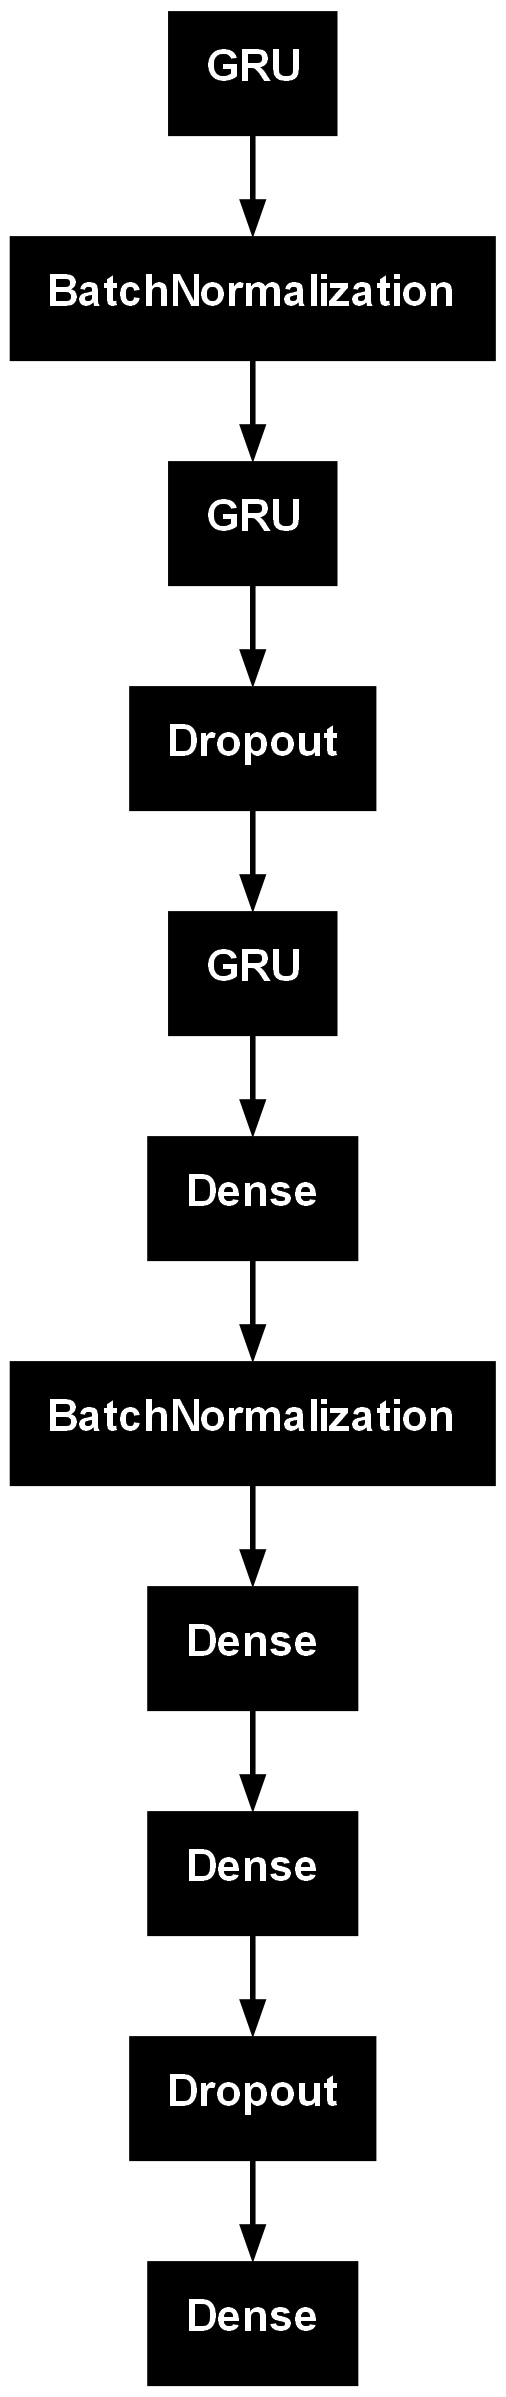

In [4]:
input_shape = 248  # Example input shape (reduced)
num_actions = 5  # Example number of actions

# Build the model
model = gru_model(input_shape, num_actions)

img = plot_model(model)

img